In [157]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# Introduction

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. Developed at AT&T Bell Laboratories by Vladimir Vapnik with colleagues SVMs are a very well understood prediction method, being based on statistical learning frameworks and VC theory. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

The advantages of support vector machines are:

- Effective in fairly high dimensional spaces.

- Fairly effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoiding over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive cross-validation scheme.

http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=E8C92EB21F0A3171A6DF5FA447F3637D?doi=10.1.1.114.4288&rep=rep1&type=pdf


In [186]:
# import some data to play with

iris = datasets.load_iris()

# To simplify plotting and explaining the SVM models
# we will only be using the first two features.
# coincidentally, in this dataset, the first two features
# are fairly strong and separable

x = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal width')

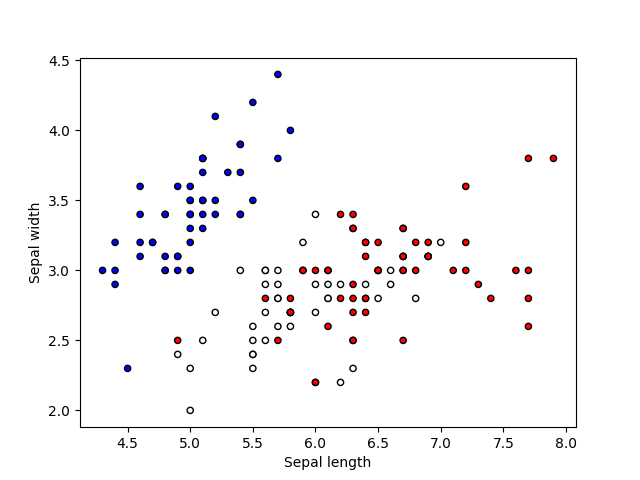

In [81]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")

# Linear Kernels
It's worth spending a bit of time getting familiar with the parameters of an SVM because they affect the output so much. In addition, understanding these parameters have a lot of carryover to other model types including complex neural networks.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [82]:
# let us create our first SVM

m = svm.SVC(kernel="linear")

m.fit(x, y)

SVC(kernel='linear')

In [187]:
# we define some helper functions to help plot decision boundaries

def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, m, xx, yy, **params):
    Z = m.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

xx, yy = make_meshgrid(x[:, 0], x[:, 1])

Text(0.5, 1.0, 'SVM with Linear kernel')

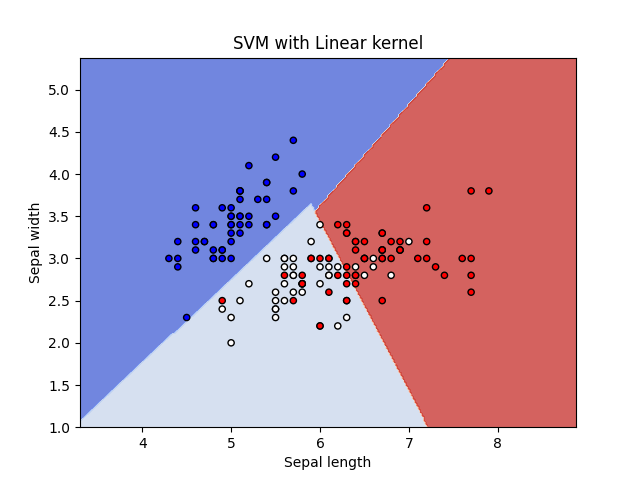

In [84]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with Linear kernel')

In [85]:
# we can see from the decision boundary that the accuracy is fairly decent

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.82

### Linear V2
Scikit Learn provides two different ways of generating 'linear' SVMs, namely the linear models `LinearSVC()` and `SVC(kernel='linear')`. These two approaches yield slightly different decision boundaries which is a consequence of the following differences:
- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

In [86]:
# Here we must increase the number of iterations in order for the model to converge

m = svm.LinearSVC(max_iter=3000)

m.fit(x, y)

LinearSVC(max_iter=3000)

Text(0.5, 1.0, 'SVM with Linear kernel')

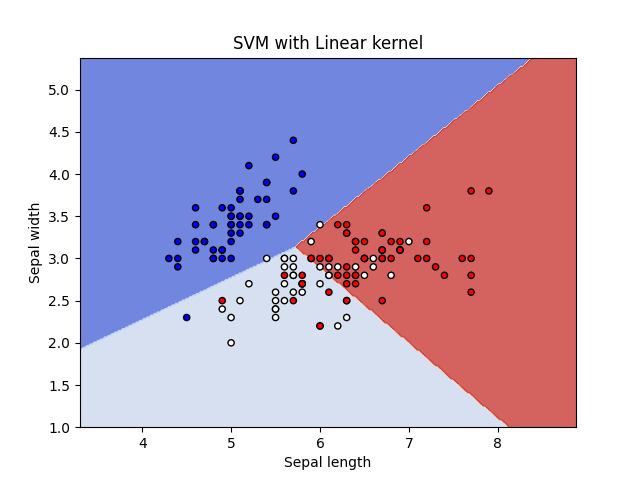

In [87]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with Linear kernel')

In [88]:
# as expected, the decision boundaries are slightly different
# in addition the classification accuracy is negligibly lower

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.8

# Polynomial Kernels

In [89]:
# Let us begin with a polynomial kernel
# The SVC function lets us specify the polynomial degree
# the higher the degree, the more "curvy" the decision boundaries!

m = svm.SVC(kernel="poly", degree=3)

m.fit(x, y)

SVC(kernel='poly')

Text(0.5, 1.0, 'SVM with Polynomial kernel')

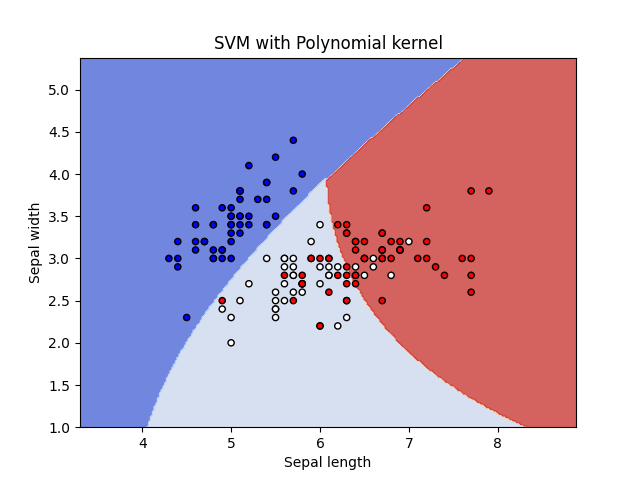

In [90]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with Polynomial kernel')

In [91]:
# This is quite good, and to be fair the classes are not perfectly separable

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.8133333333333334

In [92]:
# will increasing the degree allow us to separate the classes even better?

m = svm.SVC(kernel="poly", degree=6)

m.fit(x, y)

SVC(degree=6, kernel='poly')

Text(0.5, 1.0, 'SVM with Polynomial kernel')

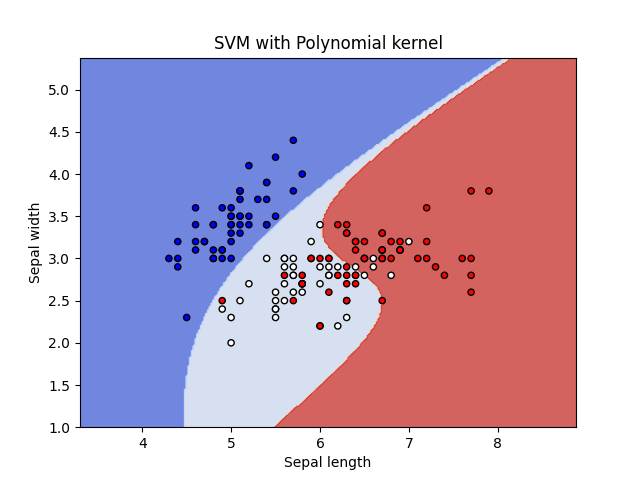

In [93]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with Polynomial kernel')

In [94]:
# Turns out that in this dataset, curvy lines are not always helpful

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.8

# RBF kernel
RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points x₁ and x₂ computes the similarity or how close they are to each other. This kernel can be mathematically represented as follows:
$$ K(x_1, x_2) = exp\left(-\frac{\left\|  x_1 - x_2\right\|^2}{2σ^2}\right) $$
where,
1. ‘σ’ is the variance and our hyperparameter
2. ||X₁ - X₂|| is the Euclidean (L₂-norm) Distance between two points X₁ and X₂


In [95]:
# The primary parameter worth playing with is the gamma

m = svm.SVC(kernel="rbf", gamma=0.7)

m.fit(x, y)

SVC(gamma=0.7)

Text(0.5, 1.0, 'SVM with RBF kernel')

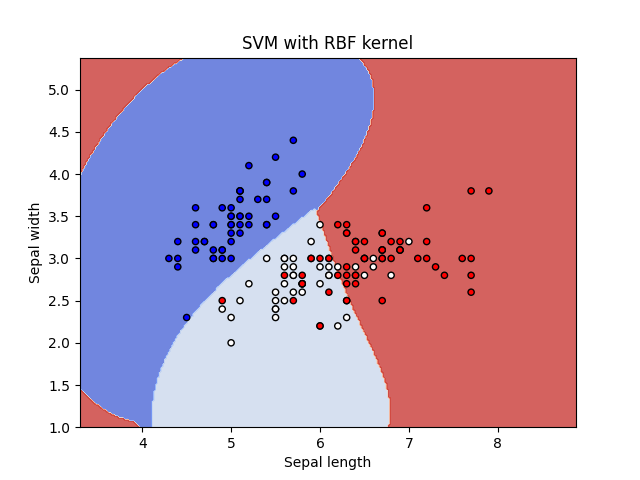

In [96]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with RBF kernel')

In [97]:
# So, out of the box, our RBF kernel performs very well

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.8266666666666667

# Hyperparameter tuning

In [123]:
# The primary parameters worth playing with are the gamma and normalization
# See if you can achieve an accuracy greater than 0.9

# What is the downside of the resulting model?

m = svm.SVC(kernel="rbf", gamma=0.1, C=1.0)

m.fit(x, y)

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.9066666666666666

Text(0.5, 1.0, 'SVM with RBF kernel')

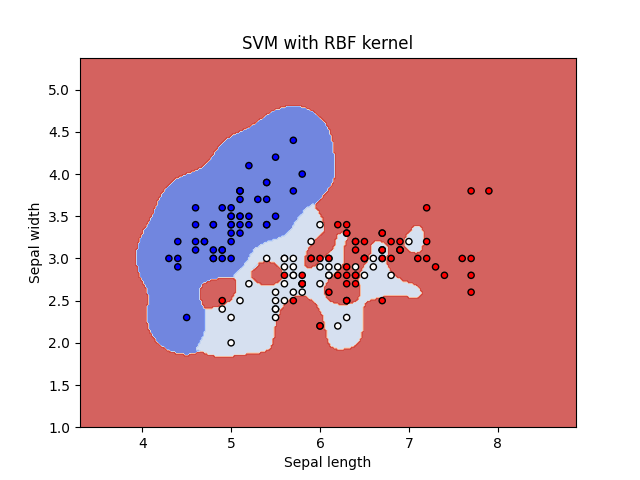

In [124]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=20, edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with RBF kernel')

In [189]:
# but if we really want to see how far we can take the hyperparameter tuning we can do a grid search
# remember that for each parameter you add, the time to test the combinations
# increases by O(n!)

from sklearn.model_selection import GridSearchCV

param = {'kernel':['rbf'],
         'gamma':[0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0], 
         'C' : [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}

m = svm.SVC()
msvm = GridSearchCV(m, param)

In [192]:
msvm.fit(x, y)
msvm.best_estimator_

SVC(C=0.1, gamma=0.5)

# Sample Weights

In [184]:
# We have an additional parameter that we can play with
# if we find out that one class is much more important to get correctly
# we can assign weights to samples belonging to that class

# we choose the same gamma parameter as the RBF above

prioritized_class = 1
weights = (y == prioritized_class) * 4 + 1

m = svm.SVC(kernel="rbf", gamma=0.7)

m.fit(x, y, sample_weight=weights)

ŷ = m.predict(x)
accuracy_score(y, ŷ)

0.72

Text(0.5, 1.0, 'SVM with RBF kernel')

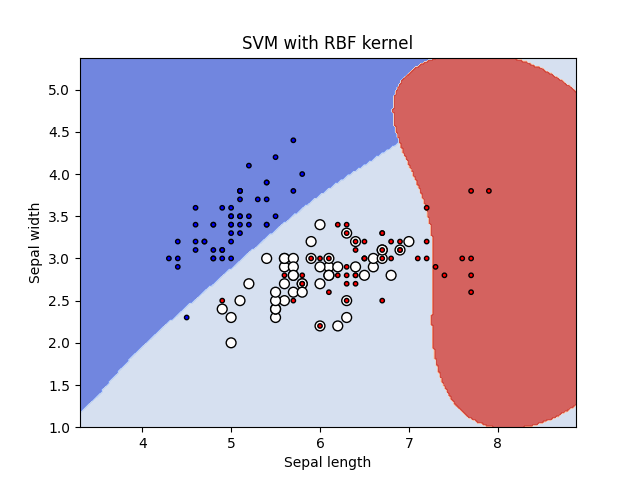

In [183]:
# we see from the accuracy score that the overall score has decreased
# but we also see from the plot below that it is due to the model
# prioritizing class 1 data much higher than the rest

# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], s=weights*10, c=y, cmap='bwr', edgecolors="k")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title('SVM with RBF kernel')

# Support Vector Machine - Regression

In [143]:
# Let us generate some sin-wave points

x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

In [144]:
# Let us begin with a non-ideal model, a linear SVM

m = svm.SVR(kernel="linear")
m.fit(x, y)

SVR(kernel='linear')

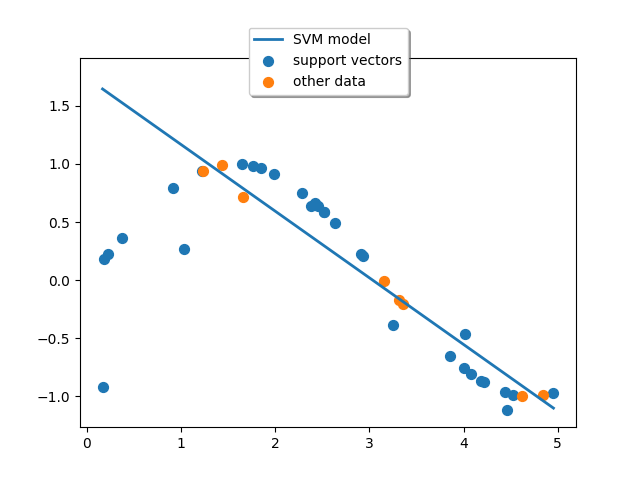

In [145]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

ax.plot(x, m.predict(x), lw=2, label="SVM model")
ax.scatter(x[m.support_], y[m.support_], s=50, label="support vectors")
ax.scatter(x[np.setdiff1d(np.arange(len(x)), m.support_)], y[np.setdiff1d(np.arange(len(x)), m.support_)],
          s=50, label="other data")
ax.legend(loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True)


In [148]:
# Obviously that was not good
# Lets try again with an RBF kernel

m = svm.SVR(kernel="rbf")
m.fit(x, y)

SVR()

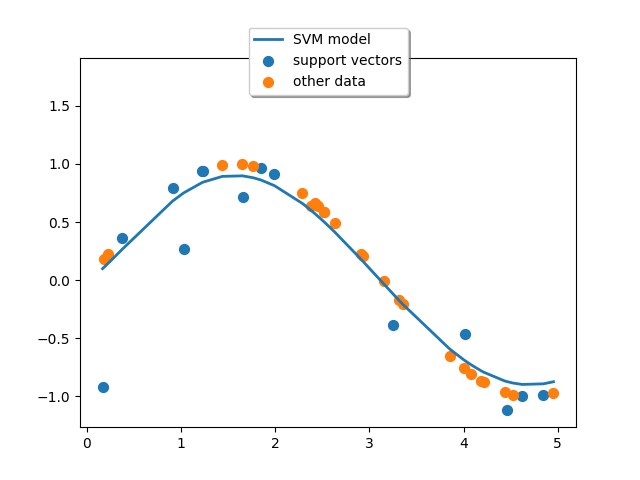

In [149]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

ax.plot(x, m.predict(x), lw=2, label="SVM model")
ax.scatter(x[m.support_], y[m.support_], s=50, label="support vectors")
ax.scatter(x[np.setdiff1d(np.arange(len(x)), m.support_)], y[np.setdiff1d(np.arange(len(x)), m.support_)],
          s=50, label="other data")
ax.legend(loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True)

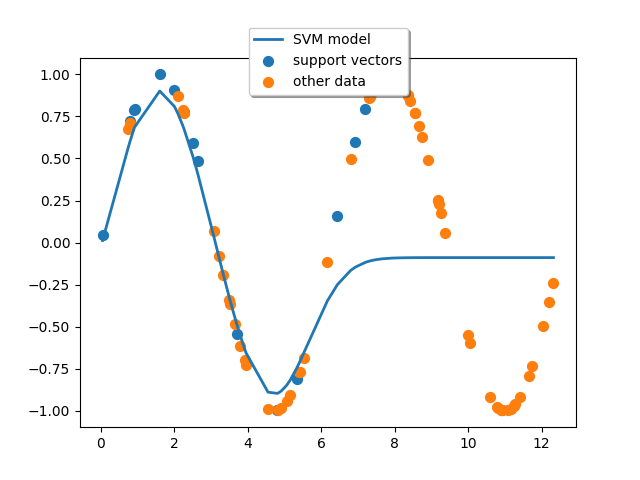

In [153]:
# much better! The question is...
# DISCUSS: will the model extrapolate past 5 on the x axis ?

x = np.sort(3.14159 * 4 * np.random.rand(80, 1), axis=0)
y = np.sin(x).ravel()
#y[::5] += 3 * (0.5 - np.random.rand(8))

# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()

ax.plot(x, m.predict(x), lw=2, label="SVM model")
ax.scatter(x[m.support_], y[m.support_], s=50, label="support vectors")
ax.scatter(x[np.setdiff1d(np.arange(len(x)), m.support_)], y[np.setdiff1d(np.arange(len(x)), m.support_)],
          s=50, label="other data")
ax.legend(loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True)